# Machine Learning - Algorithms

In [1]:
import warnings, platform
from IPython.display import display, HTML

In [2]:
### HTML display 조정
display(HTML("<style>.container {width :98% !important;}</style>"))

### Warning 제거
warnings.filterwarnings('ignore')

## Package Load

In [3]:
import random
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, cross_validate, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, RocCurveDisplay, roc_auc_score, auc

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [5]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import PolynomialFeatures

## Linear Regression
- 입력 특성에 따른 선형함수를 만들어 예측
- Least Squares Method(STAT), Gradient Descent(ML)

In [145]:
data = pd.read_csv('./ADP_book_ver01/data/insurance.csv')

In [146]:
x = data['age']
y = data['charges']

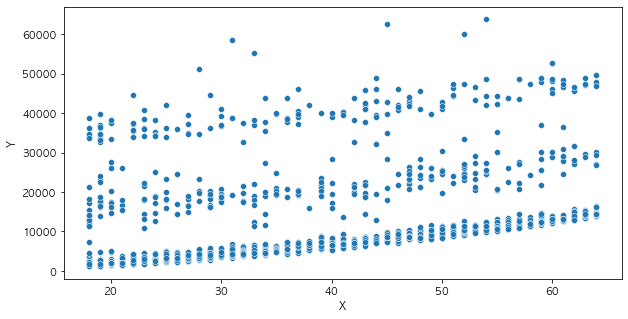

In [147]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=x.ravel(), y=y.ravel())
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [148]:
x = np.array(data['age']).reshape(len(x), 1)
y = np.array(data['charges']).reshape(len(y), 1)

In [149]:
print(x.shape, y.shape)

(1338, 1) (1338, 1)


### (1) LinearRegressor

In [150]:
from sklearn.linear_model import LinearRegression

In [151]:
### Model fit
lr = LinearRegression()
lr.fit(x, y) # 2D array 필요

LinearRegression()

In [152]:
print('선형 회귀 모델 결과')
print('절편', lr.intercept_, '계수', lr.coef_)

선형 회귀 모델 결과
절편 [3165.88500606] 계수 [[257.72261867]]


In [153]:
print(lr.score(x, y))

0.08940589967885804


In [154]:
# predict new data
x_new = [[19],[64]]
y_pred = lr.predict(x_new)
print(y_pred)

[[ 8062.61476073]
 [19660.13260074]]


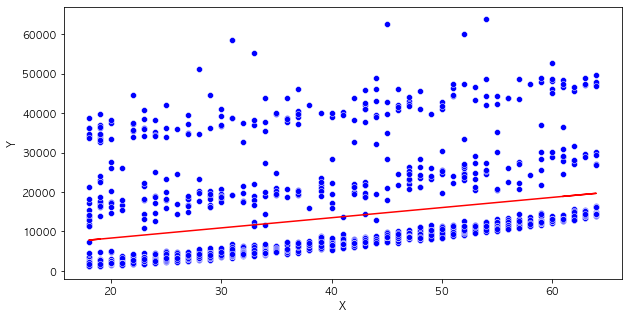

In [155]:
plt.figure(figsize=(10,5))

sns.scatterplot(x=x.ravel(), y=y.ravel(), color='blue')
plt.plot(x, lr.coef_*x + lr.intercept_, color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [156]:
### Weighted Model
x_weight = x + 5
w_lr = LinearRegression()
w_lr.fit(x, y, sample_weight=x_weight.ravel()) # 2D array 필요

LinearRegression()

In [157]:
print('선형 회귀 모델 결과')
print('절편', w_lr.intercept_, '계수', w_lr.coef_)

선형 회귀 모델 결과
절편 [2776.05842125] 계수 [[266.6494531]]


### (2) SGDRegressor
- Gradient Descent

In [158]:
from sklearn.linear_model import SGDRegressor

In [159]:
sgd_reg = SGDRegressor(max_iter=1000, random_state=34)
sgd_reg.fit(x, y.ravel()) 

SGDRegressor(random_state=34)

In [160]:
print('SGD 회귀 모델 결과')
print('절편', sgd_reg.intercept_, '계수', sgd_reg.coef_)

SGD 회귀 모델 결과
절편 [6159.32587214] 계수 [89.07765947]


In [161]:
# predict new data
x_new = [[19], [64]]
y_pred = sgd_reg.predict(x_new)
print(y_pred)

[ 7851.801402   11860.29607798]


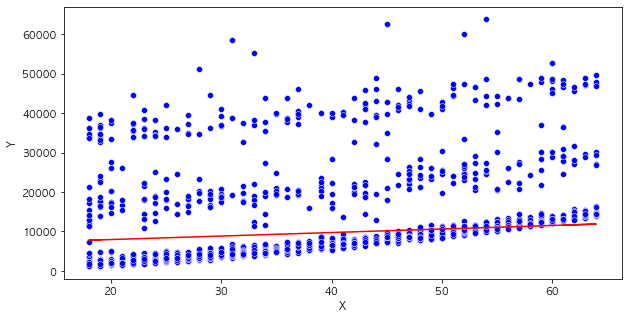

In [162]:
plt.figure(figsize=(10,5))

sns.scatterplot(x=x.ravel(), y=y.ravel(), color='blue')
plt.plot(x, sgd_reg.coef_*x + sgd_reg.intercept_, color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Polynomial Regression
- Overfitting을 주의해야 함

### (1) Polynomial Function

In [163]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [164]:
# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
x = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', x)

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(x)
poly_ftr = poly.transform(x)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [165]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

x = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n', x)
y = polynomial_func(x)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]


In [166]:
# 3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(x)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


In [167]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])

x = np.arange(4).reshape(2,2)
y = polynomial_func(x)

model = model.fit(x, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### (2) Simple Polynomial Regression

In [171]:
### cereal data
cereal = pd.read_csv('./ADP_book_ver01/data/cereal.csv')
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [172]:
cereal = cereal[cereal.columns[3:]]
cereal = cereal[cereal.sugars >= 0]
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


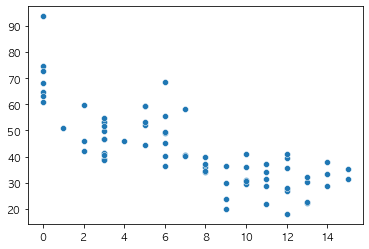

In [173]:
cereal2 = cereal[['sugars', 'rating']]
cereal2.sort_values(by=['sugars'], inplace =True)
cereal2.reset_index(drop=True, inplace =True)

x = cereal2['sugars'].values
y = cereal2['rating'].values

sns.scatterplot(x=x, y=y)
plt.show()

In [174]:
### Data split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape)

(53,) (23,)


In [175]:
### Extract poly features
poly_reg = PolynomialFeatures(degree=2) # 2차
x_poly = poly_reg.fit_transform(x_train.reshape(-1, 1))

In [176]:
from sklearn.linear_model import LinearRegression

In [177]:
### Model fit
reg = LinearRegression()
reg.fit(x_poly, y_train)

LinearRegression()

In [178]:
### Predict
x_test_poly = poly_reg.transform(x_test.reshape(-1, 1))
pred = reg.predict(x_test_poly)

In [179]:
print(np.concatenate((pred.reshape(len(pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[51.63225287 46.658844  ]
 [32.10406283 28.742414  ]
 [55.79061653 59.642837  ]
 [31.07790457 37.840594  ]
 [32.10406283 31.435973  ]
 [44.46041881 44.330856  ]
 [38.81510912 40.400208  ]
 [41.44694842 55.333142  ]
 [41.44694842 49.120253  ]
 [31.38037899 27.753301  ]
 [36.56490091 34.384843  ]
 [34.6963238  29.924285  ]
 [65.25223713 63.005645  ]
 [33.20937777 31.072217  ]
 [44.46041881 52.076897  ]
 [38.81510912 40.448772  ]
 [51.63225287 53.131324  ]
 [36.56490091 33.983679  ]
 [41.44694842 49.511874  ]
 [31.03832623 22.736446  ]
 [31.38037899 39.259197  ]
 [31.499114   31.230054  ]
 [32.10406283 21.871292  ]]


In [180]:
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(x_test.reshape(-1, 1)), y_test)

print('MSE\t{}'.format(round(mse, 3)))
print('MAE\t{}'.format(round(mae, 3)))
print('RMSE\t{}'.format(round(rmse, 3)))
print('ACC\t{}%'.format(round(acc * 100, 3)))

MSE	33.565
MAE	4.606
RMSE	5.794
ACC	74.376%


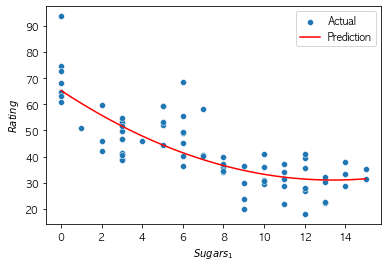

In [181]:
x_new = np.linspace(0, 15, 100).reshape(100, 1)
x_new_poly = poly_reg.transform(x_new)
y_new = reg.predict(x_new_poly)

sns.scatterplot(x=x, y=y, label='Actual')
sns.lineplot(x=x_new.reshape(1, -1)[0], y=y_new.reshape(1, -1)[0], color='red', label='Prediction')
plt.legend(loc='upper right')
plt.xlabel('$Sugars_1$')
plt.ylabel('$Rating$')
plt.show()

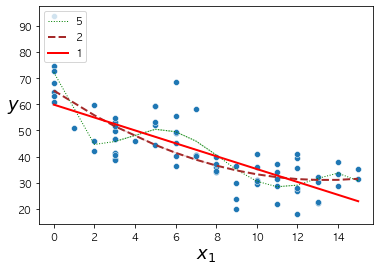

In [182]:
# Degree 별 그래프 변화
for color, style, width, degree in (("green", "dotted", 1, 5), ("brown", "dashed", 2, 2), ("red", "solid", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x_train.reshape(-1, 1), y_train)
    y_newbig = polynomial_regression.predict(x_test.reshape(-1, 1))
    sns.lineplot(x=x_test, y=y_newbig, color=color, linestyle=style, label=str(degree), linewidth=width)

sns.scatterplot(x=x, y=y)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

### (2) Multi-variable Polynomial Regression

In [183]:
x = cereal.iloc[:, :-1].values
y = cereal.iloc[:, -1].values

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(53, 12) (23, 12) (53,) (23,)


In [185]:
### Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)

In [186]:
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_train)
reg = LinearRegression()
reg.fit(x_poly, y_train)

LinearRegression()

In [187]:
### Predict
x_test_poly = poly_reg.transform(x_test)
pred = reg.predict(x_test_poly)

In [188]:
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(x_test), y_test)

print('MSE\t{}'.format(round(mse, 3)))
print('MAE\t{}'.format(round(mae, 3)))
print('RMSE\t{}'.format(round(rmse, 3)))
print('ACC\t{}%'.format(round(acc * 100, 3)))

MSE	9.81
MAE	2.193
RMSE	3.132
ACC	92.476%


## Multiple Regression with Penalty
- 여러 개의 독립변수로 회귀분석
- Overfitting 방지를 위해, 다양한 규제 적용 필요
- 변수선택법은 주로 통계적 회귀분석에 적용됨

### (1) Ridge Regression
- L2 penalty 추가
- 계수 추정치가 0으로 수렴 (not 0)
- alpha: 0이면 규제 없음. 커질수록 강한 규제

In [189]:
from sklearn.datasets import load_diabetes

In [190]:
diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

In [191]:
from sklearn.linear_model import Ridge

In [192]:
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42) # 정규방정식
ridge_reg.fit(x, y)
ridge_reg.predict(x.iloc[1].values.reshape(1, -1))

array([90.99902729])

In [193]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)  # 확률적 경사 하강법
sgd_reg.fit(x, y.ravel())
sgd_reg.predict(x.iloc[1].values.reshape(1, -1))

array([88.25574167])

In [194]:
alpha = np.logspace(-3, 1, 5)

data = list()
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a)
    ridge.fit(x, y)
    data.append(pd.Series(np.hstack([ridge.coef_])))

df_ridge = pd.DataFrame(data, index=alpha)
df_ridge.columns = x.columns
df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.551414,-239.090354,520.363367,323.828627,-712.328205,413.383794,65.811629,167.513774,720.944468,68.122100
0.010,-7.199457,-234.552930,520.583136,320.523356,-380.607066,150.483752,-78.591232,130.313059,592.349587,71.133768
0.100,1.307349,-207.194814,489.691080,301.769437,-83.466074,-70.828096,-188.680164,115.712703,443.814054,86.748539
1.000,29.465746,-83.154885,306.351627,201.629434,5.909369,-29.515927,-152.040465,117.311715,262.944995,111.878718
10.000,19.812822,-0.918458,75.416167,55.025419,19.924600,13.948686,-47.553816,48.259420,70.144068,44.213876


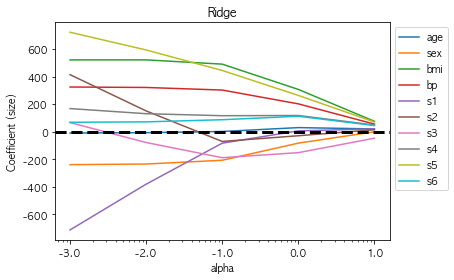

In [195]:
### Log graph
plt.semilogx(df_ridge) 
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ridge.columns, bbox_to_anchor=(1, 1))
plt.title('Ridge')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)
plt.show()

In [196]:
from sklearn.linear_model import LinearRegression

In [197]:
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

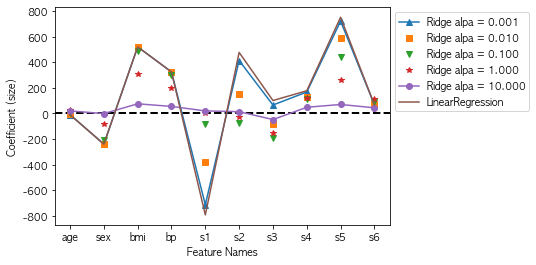

In [198]:
### 일반적인 Regression과 비교
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_ridge.loc[0.001], '^-', label='Ridge alpa = 0.001')
plt.plot(df_ridge.loc[0.010], 's', label='Ridge alpa = 0.010')
plt.plot(df_ridge.loc[0.100], 'v', label='Ridge alpa = 0.100')
plt.plot(df_ridge.loc[1.000], '*', label='Ridge alpa = 1.000')
plt.plot(df_ridge.loc[10.000], 'o-', label='Ridge alpa = 10.000')
plt.plot(lr.coef_, label='LinearRegression')

plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

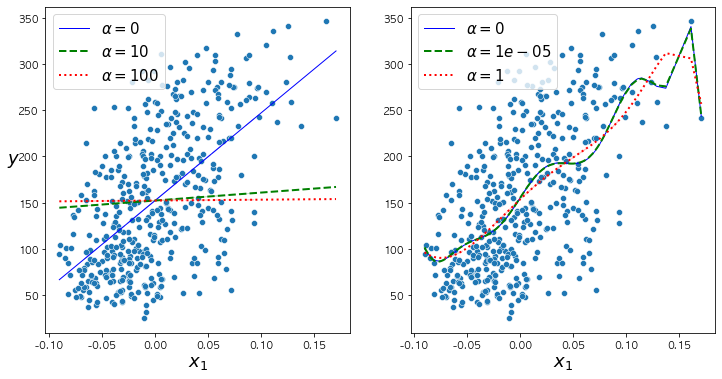

In [199]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    sns.scatterplot(x=x.loc[:, 'bmi'], y=y)
    for alpha, style in zip(alphas, (("blue", "solid"), ("green", "dashed"), ("red","dotted"))):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(x.loc[:, 'bmi'].values.reshape(-1, 1), y)
        x_new = x.loc[:, 'bmi']
        y_new_regul = model.predict(x_new.values.reshape(-1, 1))
        lw = 2 if alpha > 0 else 1
        sns.lineplot(x=x_new, y=y_new_regul, color=style[0], linestyle=style[1], linewidth=lw, label=r"$\alpha = {}$".format(alpha))

    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

### (2) Lasso Regression
- L1 panelty 추가
- 변수 개수가 많은 경우, Ridge 해석의 어려움을 해결하기 위한 방법
- 덜 중요한 특징의 가중치를 없앰 (Sparse model)
- 특성 수(p)가 데이터 수(n)보다 많거나, 강하게 연관된 경우 추천하지 않음 (ElasticNet 권장)

In [205]:
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

In [206]:
from sklearn.linear_model import Lasso

In [207]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x, y)
lasso_reg.predict(x.iloc[1].values.reshape(1, -1))

array([73.84042028])

In [208]:
alpha = np.logspace(-3, 1, 5)

data = list()
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a)
    lasso.fit(x, y)
    data.append(pd.Series(np.hstack([lasso.coef_])))

df_lasso = pd.DataFrame(data, index=alpha)
df_lasso.columns = x.columns
df_lasso

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.998449,-238.899740,520.261362,323.429484,-720.251734,421.405141,66.734168,164.448873,725.340440,67.475538
0.010,-1.306575,-228.822331,525.560658,316.175320,-307.013677,89.321688,-105.081398,119.597989,571.330871,65.007316
0.100,-0.000000,-155.362882,517.182017,275.082351,-52.540269,-0.000000,-210.159753,0.000000,483.914409,33.672821
1.000,0.000000,-0.000000,367.701852,6.301904,0.000000,0.000000,-0.000000,0.000000,307.605700,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


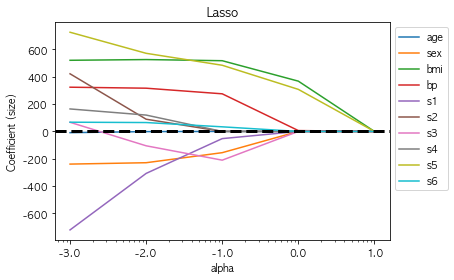

In [209]:
### Log graph
plt.semilogx(df_lasso)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_lasso.columns, bbox_to_anchor=(1, 1))
plt.title('Lasso')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)
plt.show()

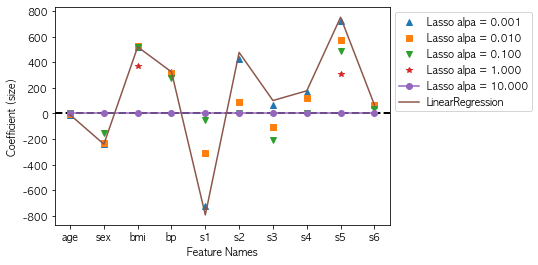

In [210]:
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_lasso.loc[0.001], '^', label='Lasso alpa = 0.001')
plt.plot(df_lasso.loc[0.010], 's', label='Lasso alpa = 0.010')
plt.plot(df_lasso.loc[0.100], 'v', label='Lasso alpa = 0.100')
plt.plot(df_lasso.loc[1.000], '*', label='Lasso alpa = 1.000')
plt.plot(df_lasso.loc[10.000], 'o-', label='Lasso alpa = 10.000')
plt.plot(lr.coef_, label='LinearRegression')

plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

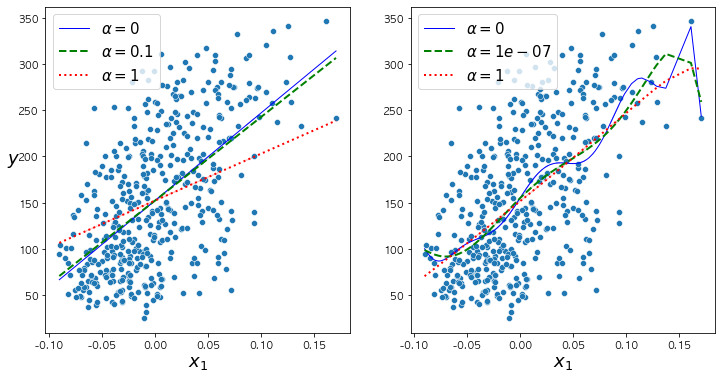

In [211]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)
plt.show()

### (3) ElasticNet
- Ridge + Lasso
- r(l1_ratio)로 두 규제항의 비율 조정. 0이면 Ridge, 1이면 Lasso

In [215]:
from sklearn.linear_model import ElasticNet

In [216]:
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

In [217]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(x, y)
elastic_net.predict(x.iloc[1].values.reshape(1, -1))

array([141.85718044])

In [218]:
alpha = np.logspace(-3, 1, 5)

data = list()
for i, a in enumerate(alpha):
    ela = ElasticNet(alpha=a, l1_ratio=0.5)
    ela.fit(x, y)
    data.append(pd.Series(np.hstack([ela.coef_])))

df_ela = pd.DataFrame(data, index=alpha)
df_ela.columns=x.columns
df_ela

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,8.705295,-178.076275,450.881224,281.072686,-44.049984,-77.944846,-188.958313,119.794742,393.703478,98.943695
0.010,33.147202,-35.245609,211.023930,144.560115,21.931533,0.000000,-115.620017,100.658838,185.326334,96.257214
0.100,10.286327,0.285976,37.464643,27.544899,11.108850,8.355884,-24.120808,25.505488,35.465757,22.894981
1.000,0.359018,0.000000,3.259767,2.204356,0.528646,0.250935,-1.861363,2.114454,3.105841,1.769851
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [219]:
np.hstack([ela.coef_]).shape

(10,)

In [220]:
ela.coef_.shape

(10,)

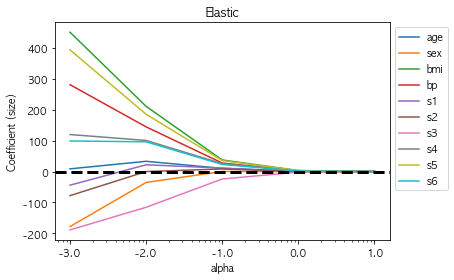

In [221]:
plt.semilogx(df_ela)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ela.columns, bbox_to_anchor=(1, 1))
plt.title('Elastic')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)
plt.show()

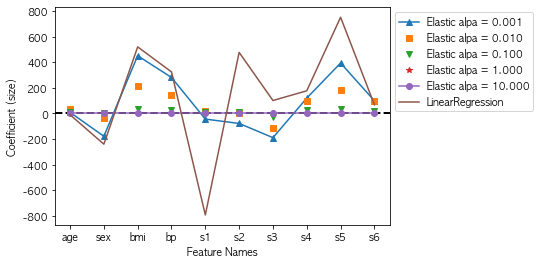

In [222]:
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_ela.loc[0.001], '^-', label='Elastic alpa = 0.001')
plt.plot(df_ela.loc[0.010], 's', label='Elastic alpa = 0.010')
plt.plot(df_ela.loc[0.100], 'v', label='Elastic alpa = 0.100')
plt.plot(df_ela.loc[1.000], '*', label='Elastic alpa = 1.000')
plt.plot(df_ela.loc[10.000], 'o-', label='Elastic alpa = 10.000')
plt.plot(lr.coef_,label='LinearRegression')

plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [223]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(x, y)
elastic_net.predict(x.iloc[1].values.reshape(1, -1))

array([141.85718044])

### (4) Huber Regression
- Huber loss function 사용
- Error가 작을 때에는 L2-error, 클 때는 L1-error
- 미분 불가능한 L1의 단점과, outlier에 민감한 L2의 단점 극복

In [227]:
from sklearn.linear_model import HuberRegressor

In [228]:
huber = HuberRegressor()

In [229]:
huber.fit(x, y)

HuberRegressor()

In [230]:
huber.get_params()

{'alpha': 0.0001,
 'epsilon': 1.35,
 'fit_intercept': True,
 'max_iter': 100,
 'tol': 1e-05,
 'warm_start': False}

In [231]:
huber.score(x, y) # R2-score

0.6631280966951211

In [232]:
huber.predict(x[:1,])

array([26.6325949])

### (5) Quantile Regression
- 조건부 분위수를 모델링

In [233]:
from sklearn.linear_model import QuantileRegressor

In [234]:
qs = [0.1, 0.25, 0.5, 0.75, 0.9]
intercepts = []
slopes = []

for q in qs:
    qreg = QuantileRegressor(quantile=q, alpha=0, solver="highs")
    qreg.fit(x, y)
    intercept = round(qreg.intercept_,4)
    slope = qreg.coef_
    
    intercepts.append(intercept)
    slopes.append(slope)
    
    print(f'q : {q}, intercept : {intercept}, slope : {slope}')

q : 0.1, intercept : 22.7092, slope : [-1.42283413e-01  2.78238186e-03  8.10827808e-02 -7.02560711e+00
  2.95048481e+00 -1.96840159e-02 -5.36594853e-01  1.30163527e-01
 -1.40169139e-02 -5.16680701e-01  6.98940351e-03 -3.89022506e-01]
q : 0.25, intercept : 15.0665, slope : [-0.11455018  0.02338483  0.00902755 -5.18958687  4.69148913 -0.03720473
 -0.93408654  0.15293722 -0.01347674 -0.63631399  0.01028738 -0.29215348]
q : 0.5, intercept : 17.9356, slope : [-0.1449365   0.035598    0.0303175  -9.32507243  5.04813678 -0.02369207
 -0.99645507  0.21672049 -0.01179534 -0.7980185   0.01123164 -0.33186992]
q : 0.75, intercept : 21.3541, slope : [-8.34669396e-02  6.64626161e-02 -4.31758517e-02 -1.33596169e+01
  5.50420009e+00  6.84399528e-03 -1.31919947e+00  2.79655698e-01
 -8.61860402e-03 -1.03823525e+00  1.49071303e-02 -3.83286158e-01]
q : 0.9, intercept : 36.9244, slope : [-6.42282416e-02  3.93733062e-02 -1.94931929e-03 -2.32973945e+01
  5.49084269e+00  1.45503074e-02 -1.47682918e+00  4.22000

## Logistic Regression
- 반응변수(Y)가 특정 Class에 속할 확률 모델링 (Logit 함수를 선형 모델링)
- Logit: Log Odds = log(p/1-p)
    - Odds는 실패 대비 성공할 확률 (p/1-p)
    - X가 Unit 증가하면, Odds * exp(계수) 만큼의 Y=1 확률 증가
- Sigmoid(Logistic) Function
- MLE 기법을 사용하여 계수 추정
- 선형 회귀 모델을 기반으로 하기 때문에 결정 경계는 선형이며, Penalty도 줄 수 있음(default=L2, C=1.0)
- C는 alpha의 역수로, C가 높을수록 규제가 줄어듦

### (1) Binary

In [6]:
body = pd.read_csv('./ADP_book_ver01/data/bodyPerformance.csv')

body['gender'] = np.where(body['gender']=='M', 0, 1) # gender encoding
body['class_1'] = np.where(body['class']=='A', 1, 0) # Binary class로 변경
body.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0


In [7]:
feature_columns = list(body.columns.difference(['class', 'class_1'])) 
x = body[feature_columns]
y = body['class_1']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, train_size=0.7, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
### Modeling
logistic=LogisticRegression() ### scikit-learn 0.23.1 환경에서 default (lbfgs) 설정 시 에러 발생할 가능성 있음. solver='liblinear' 설정하여 해결
logistic.fit(x_train, y_train)

LogisticRegression()

In [11]:
proba = pd.DataFrame(logistic.predict_proba(x_train))
cs = logistic.decision_function(x_train) # Decision function: confidence score. x=0 인 hyperplane을 기준으로 양/음수 여부와 얼만큼 멀리 떨어져있는가 측정

df = pd.concat([proba, pd.DataFrame(cs)], axis=1)
df.columns=['Not A', 'A', 'decision_function']
df.sort_values(['decision_function'], inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,Not A,A,decision_function
0,1.0,1.616498e-08,-17.940419
1,1.0,8.127278e-08,-16.325455
2,1.0,8.931998e-08,-16.231041
3,1.0,1.075398e-07,-16.045405
4,1.0,1.297740e-07,-15.857471


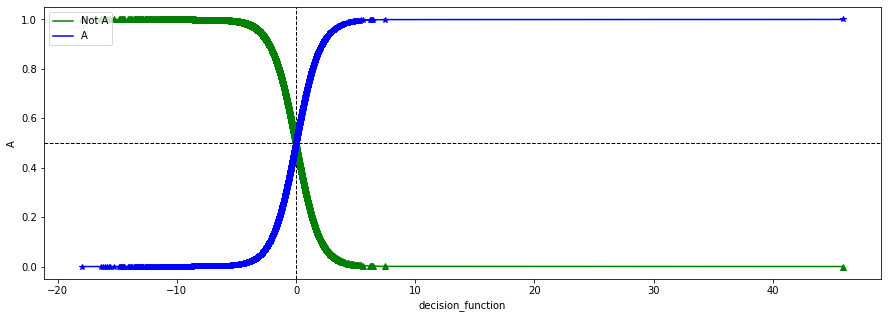

In [12]:
plt.figure(figsize=(15, 5))

plt.axhline(y=0.5, linestyle='--', color='black', linewidth=1)
plt.axvline(x=0, linestyle='--', color='black', linewidth=1)

sns.lineplot(x=df['decision_function'], y=df['Not A'], color='green', linestyle='dashed', label='Not A')
plt.plot(df['decision_function'], df['Not A'], 'g^')
sns.lineplot(x=df['decision_function'], y=df['A'], color='blue', linestyle='dashed', label='A')
plt.plot(df['decision_function'], df['A'], 'b*')

plt.legend(loc='upper left')
plt.show()

In [242]:
pred = logistic.predict(x_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('정확도\t{}%'.format(round(test_acc*100, 2)))
print('정밀도\t{}%'.format(round(test_prc*100, 2)))
print('재현율\t{}%'.format(round(test_rcll*100, 2)))
print('F1\t{}%'.format(round(test_f1*100, 2)))

[[2766  248]
 [ 346  658]]
정확도	85.22%
정밀도	72.63%
재현율	65.54%
F1	68.9%


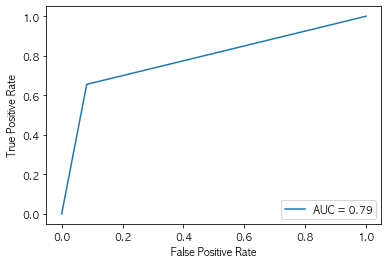

In [243]:
fpr, tpr, thresholds = roc_curve(y_test, pred) 
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc) # plot_roc_curve plot_roc_curve(logistic, test_x, test_y)함수가 sklearn 1.2.1부터 대체됨
display.plot()

In [244]:
logistic.predict_proba(x_test)

array([[0.51732091, 0.48267909],
       [0.09247449, 0.90752551],
       [0.19064558, 0.80935442],
       ...,
       [0.99680443, 0.00319557],
       [0.61521227, 0.38478773],
       [0.72165222, 0.27834778]])

In [245]:
gain_df = get_gain_table(logistic, x_test, y_test)
gain_df

,group,num_of_response,num_of_data,individual_gain,gain
0,1,324,402,0.322709,0.322709
1,2,270,402,0.268924,0.591633
2,3,210,402,0.209163,0.800797
3,4,128,401,0.127490,0.928287
4,5,56,402,0.055777,0.984064
5,6,15,402,0.014940,0.999004
6,7,1,401,0.000996,1.000000
7,8,0,402,0.000000,1.000000
8,9,0,402,0.000000,1.000000
9,10,0,402,0.000000,1.000000


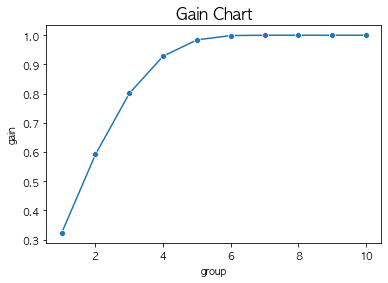

In [246]:
sns.lineplot(x=gain_df['group'], y=gain_df['gain'], marker='o')

plt.title('Gain Chart', fontsize=16)
plt.show()

In [247]:
lift_df = get_lift_table(logistic, x_test, y_test)
lift_df

,group,num_of_response,num_of_data,response_rate,lift
0,1,324,402,0.805970,3.225486
1,2,270,402,0.671642,2.687905
2,3,210,402,0.522388,2.090593
3,4,128,401,0.319202,1.277444
4,5,56,402,0.139303,0.557491
5,6,15,402,0.037313,0.149328
6,7,1,401,0.002494,0.009980
7,8,0,402,0.000000,0.000000
8,9,0,402,0.000000,0.000000
9,10,0,402,0.000000,0.000000


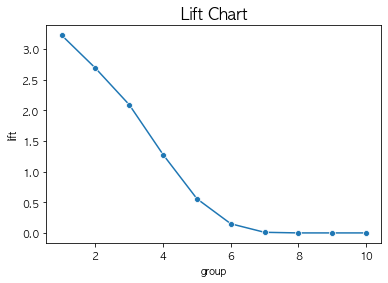

In [248]:
sns.lineplot(x=lift_df['group'], y=lift_df['lift'], marker='o')
plt.title('Lift Chart', fontsize=16)
plt.show()

In [249]:
### Iris data
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target

In [250]:
x = iris.iloc[:, 3:4]  # 꽃잎 너비
y = (iris["Class"]==2).astype(int)  # Iris virginica이면 1 아니면 0

In [251]:
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(x, y)

LogisticRegression(random_state=42)

1.6606606606606606


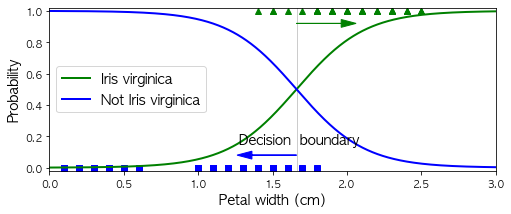

In [252]:
x_new = np.linspace(0, 3, 1000)
y_proba = log_reg.predict_proba(x_new.reshape(-1, 1))
decision_boundary = x_new[y_proba[:, 1] >= 0.5][0]
print(decision_boundary)

plt.figure(figsize=(8, 3))

plt.plot(x[y==0], y[y==0], "bs")
plt.plot(x[y==1], y[y==1], "g^")
sns.lineplot(x=[decision_boundary, decision_boundary], y=[-1, 2], color="black", linestyle="dashed", linewidth=2)
sns.lineplot(x=x_new, y=y_proba[:, 1], color="green", linewidth=2, label="Iris virginica")
sns.lineplot(x=x_new, y=y_proba[:, 0], color="blue", linewidth=2, label="Not Iris virginica")

plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [253]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [254]:
x = iris.iloc[:, 2:4]  # petal length, petal width
y = (iris["Class"]==2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42) # 높은 C 값으로 규제 줄임
log_reg.fit(x, y)

LogisticRegression(C=10000000000, random_state=42)

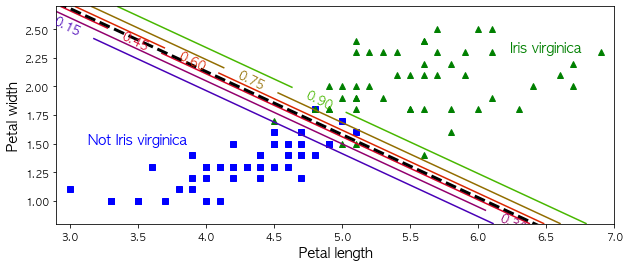

In [255]:
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1), np.linspace(0.8, 2.7, 200).reshape(-1, 1))
x_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(x_new)

plt.figure(figsize=(10, 4))
plt.plot(x.iloc[:, 0][y==0], x.iloc[:, 1][y==0], "bs")
plt.plot(x.iloc[:, 0][y==1], x.iloc[:, 1][y==1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
sns.lineplot(x=left_right, y=boundary, color="black", linestyle="dashed", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [266]:
from sklearn.datasets import load_breast_cancer

In [267]:
### Breast cancer data
cancer = load_breast_cancer()

In [268]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

x_train, x_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [269]:
# 로지스틱 회귀를 이용하여 학습 및 예측 수행.
# solver 인자값을 생성자로 입력하지 않으면 solver='lbfgs'
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
lr_preds = lr_clf.predict(x_test)

# accuracy와 roc_auc 측정
print('accuracy: {0:.3f}, roc_auc:{1:.3f}'.format(accuracy_score(y_test, lr_preds), roc_auc_score(y_test , lr_preds)))

accuracy: 0.977, roc_auc:0.972


In [270]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

# 여러개의 solver 값별로 LogisticRegression 학습 후 성능 평가
for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(x_train, y_train)
    lr_preds = lr_clf.predict(x_test)
    
    # accuracy와 roc_auc 측정
    print('solver:{0}, accuracy: {1:.3f}, roc_auc:{2:.3f}'.format(solver, accuracy_score(y_test, lr_preds), roc_auc_score(y_test , lr_preds)))

solver:lbfgs, accuracy: 0.977, roc_auc:0.972
solver:liblinear, accuracy: 0.982, roc_auc:0.979
solver:newton-cg, accuracy: 0.977, roc_auc:0.972
solver:sag, accuracy: 0.982, roc_auc:0.979
solver:saga, accuracy: 0.982, roc_auc:0.979


In [271]:
params={'solver':['liblinear', 'lbfgs'], 'penalty':['l2', 'l1'], 'C':[0.01, 0.1, 1, 1, 5, 10]}

lr_clf = LogisticRegression()
grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.979


### (2) Multiclass (Multinomial: Softmax)

In [288]:
body['gender'] = np.where(body['gender']=='M', 0, 1) # gender 변수 전처리

mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 4} # class 변수 전처리
body['class_2'] = body['class'].map(mapping)
body.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1,class_2
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0,1


In [289]:
feature_columns = list(body.columns.difference(['class', 'class_2']))
x = body[feature_columns]
y = body['class_2']

In [290]:
train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, train_size=0.7, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(9375, 12) (4018, 12) (9375,) (4018,)


In [291]:
softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10) # multi_class parameter 입력
softmax.fit(train_x, train_y)

LogisticRegression(C=10, multi_class='multinomial')

In [292]:
pred = softmax.predict(test_x)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)

print(test_cm)
print('정확도\t{}%'.format(round(test_acc * 100, 2)))

[[726 244  34   0]
 [246 440 285  33]
 [ 83 228 499 195]
 [ 14  65 151 775]]
정확도	60.73%


In [293]:
softmax.predict([test_x.iloc[-1,:]])

array([0])

In [294]:
softmax.predict_proba([test_x.iloc[-1,:]])

array([[0.71958829, 0.24248337, 0.03712822, 0.00080012]])

In [295]:
### Iris data
x = iris.iloc[:, 2:4]  # 꽃잎 길이, 꽃잎 너비
y = iris["Class"]

In [296]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(x, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

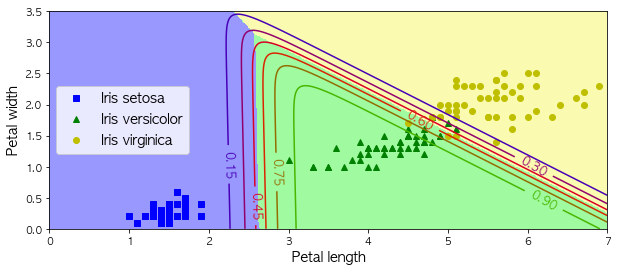

In [297]:
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1), np.linspace(0, 3.5, 200).reshape(-1, 1))
x_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(x_new)
y_predict = softmax_reg.predict(x_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(x.iloc[:, 0][y==0], x.iloc[:, 1][y==0], "bs", label="Iris setosa")
plt.plot(x.iloc[:, 0][y==1], x.iloc[:, 1][y==1], "g^", label="Iris versicolor")
plt.plot(x.iloc[:, 0][y==2], x.iloc[:, 1][y==2], "yo", label="Iris virginica")

plt.contourf(x0, x1, zz, cmap=ListedColormap(['#9898ff', '#a0faa0', '#fafab0']))
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [298]:
softmax_reg.predict([[5, 2]])

array([2])

In [299]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

## Support Vector Machine (SVM)
- 최대 마진을 갖는 선형 초평면 찾기 (Classifier)
- 마진 안에 최대한 많은 샘플이 들어가도록 fit (Regressor)
- Kernel: 두 관측치들의 유사성을 수량화하는 함수. 비선형 자료에 사용
    - RBF (Random Forest), Linear, Poly
- 이상치에 민감한 편

### (1) SVClassifier

In [313]:
c = pd.read_csv('./ADP_book_ver01/data/classification.csv')
c.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


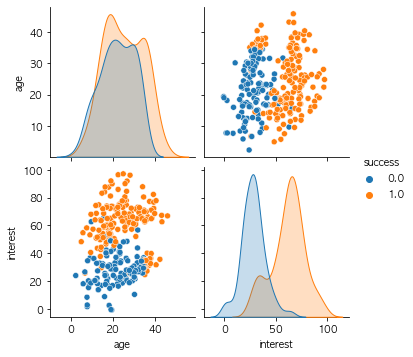

In [314]:
sns.pairplot(hue='success', data=c)
plt.show()

In [315]:
x = c[['age', 'interest']]
y = c['success']

In [316]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, train_size=0.7, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(207, 2) (90, 2) (207,) (90,)


In [317]:
### Scaling
scaler = StandardScaler()
train_x = scaler.fit_transform(x_train)

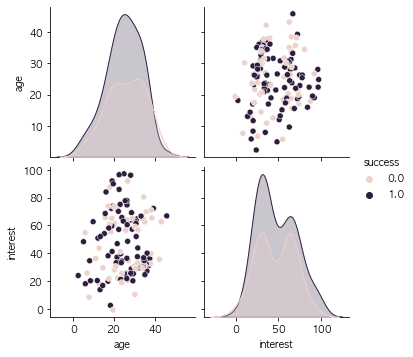

In [318]:
sns.pairplot(data=pd.concat([pd.DataFrame(x_train), y_train.reset_index(drop=True)], axis=1), hue='success')
plt.show()

#### SVC

In [319]:
from sklearn.svm import SVC

In [320]:
### Modeling
# C = 오차 허용량
clf = SVC(C = 0.5)
clf.fit(x_train, y_train)

SVC(C=0.5)

In [321]:
x_test_scaled = scaler.transform(x_test)
pred = clf.predict(x_test_scaled)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('정확도\t{}%'.format(round(test_acc*100, 2)))
print('정밀도\t{}%'.format(round(test_prc*100, 2)))
print('재현율\t{}%'.format(round(test_rcll*100, 2)))
print('F1\t{}%'.format(round(test_f1*100, 2)))

[[39  0]
 [51  0]]
정확도	43.33%
정밀도	0.0%
재현율	0.0%
F1	0.0%


#### LinearSVC

In [322]:
from sklearn.svm import LinearSVC

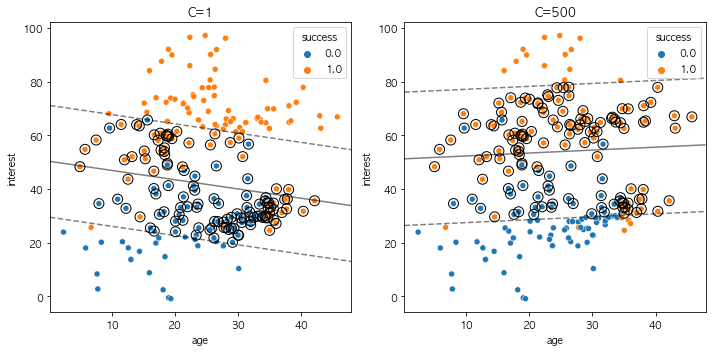

In [324]:
### Linear SVC
plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 500]):
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(x_train, y_train)
    
    # decision function으로 서포트벡터 얻기
    decision_function = clf.decision_function(x_train)
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = x_train.iloc[support_vector_indices]

    plt.subplot(1, 2, i + 1) # subplot 생성
    sns.scatterplot(x=x_train.iloc[:, 0], y=x_train.iloc[:, 1], hue=y_train)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)
    )
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(
        xx,
        yy,
        Z,
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors.iloc[:, 0],
        support_vectors.iloc[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C="+str(C))
plt.tight_layout()
plt.show()

In [325]:
### Iris data
x = iris.iloc[:, 2:4]  # 꽃잎 길이, 꽃잎 너비
y = iris["Class"]

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, random_state=42)),
    ])

svm_clf.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, random_state=42))])

In [326]:
svm_clf.predict([[5.5, 1.7]])

array([2])

#### PolynomialSVC

In [327]:
from sklearn.datasets import make_moons

In [328]:
x, y = make_moons(n_samples=100, noise=0.15, random_state=42) # 반달 모양 데이터셋 만들기

### Polynomial SVM
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(x, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

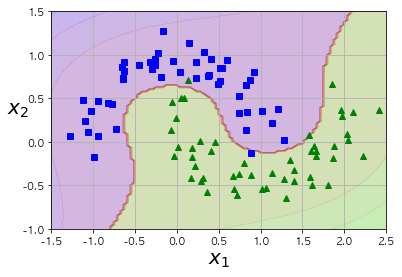

In [329]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^"),
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

#### Kernels

In [330]:
### Polynomial Kernel
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(x, y)

poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5)) # coef0: 모델이 높은 차수와 낮은 차수에 얼마나 영향받을지 조정
    ])
poly100_kernel_svm_clf.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

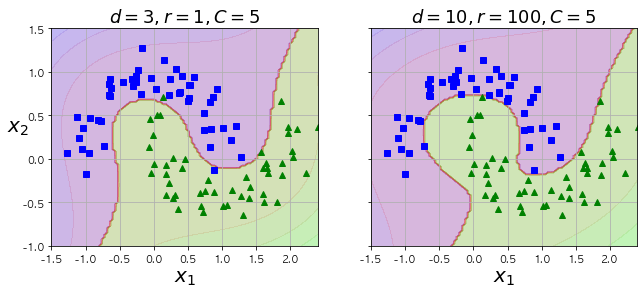

In [331]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")
plt.show()

In [332]:
### Gaussian RBF Kernel
# gamma: 종 모양의 강도. 높을수록 좁아져서 결정 경계가 불규칙해짐
# C: 오차 허용 정도
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

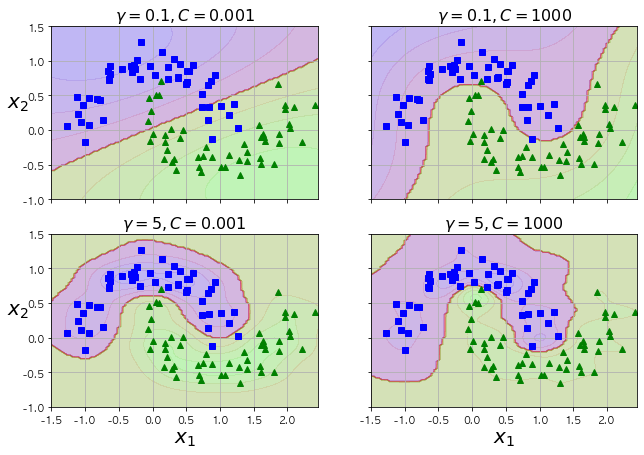

In [333]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(x, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(x, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

### (2) SVRegressor

#### LinearSVR

In [334]:
### 샘플 data 생성
np.random.seed(42)
m = 50
x = 2 * np.random.rand(m, 1)
y = (4 + 3 * x + np.random.randn(m, 1)).ravel()

print(x.shape, y.shape)

(50, 1) (50,)


In [335]:
from sklearn.svm import LinearSVR

In [336]:
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(x, y)

LinearSVR(epsilon=1.5, random_state=42)

In [337]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(x, y)
svm_reg2.fit(x, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, x, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, x, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

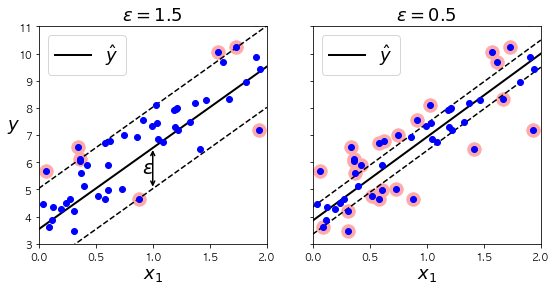

In [338]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

plt.sca(axes[0])
plot_svm_regression(svm_reg1, x, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, x, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

#### Non-linear SVR

In [339]:
### 샘플 data 생성
np.random.seed(42)
m = 100
x = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * x + 0.5 * x**2 + np.random.randn(m, 1)/10).ravel()
print(x.shape, y.shape)

(100, 1) (100,)


In [340]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(x, y)
svm_poly_reg2.fit(x, y)

SVR(C=0.01, degree=2, kernel='poly')

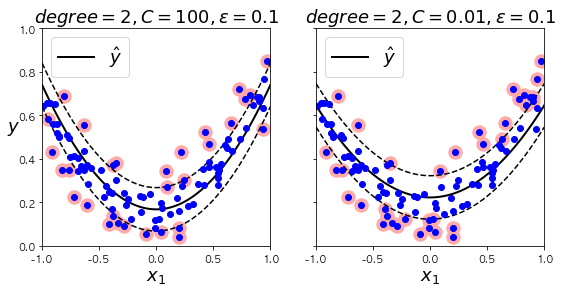

In [341]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, x, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, x, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

In [342]:
### 샘플데이터 생성하기
x = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(x).ravel()

print(x[0:6], '\n\n', y[0:10])

[[0.07728308]
 [0.12157983]
 [0.48588247]
 [0.70042008]
 [0.84746373]
 [0.8855534 ]] 

 [0.07720617 0.12128053 0.46698888 0.64453892 0.7496041  0.77426533
 0.82838306 0.98609876 0.99471692 0.99514769]


In [343]:
### 타깃데이터에 노이즈 추가하기
y[::5] += 3 * (0.5 - np.random.rand(8))

print(y[0:10])

[-0.85313401  0.12128053  0.46698888  0.64453892  0.7496041  -0.32695163
  0.82838306  0.98609876  0.99471692  0.99514769]


In [344]:
from sklearn.svm import SVR

In [345]:
### Model fit
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=0.1, coef0=1)

svr_rbf.fit(x, y)
svr_lin.fit(x, y)
svr_poly.fit(x, y)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [346]:
rbf_pred = svr_rbf.predict(x)
lin_pred = svr_lin.predict(x)
poly_pred = svr_poly.predict(x)

preds = [rbf_pred, lin_pred, poly_pred]
kernel = ['Random_Forest', 'Linear', 'Polynomial']
evls = ['mse', 'rmse', 'mae']

results = pd.DataFrame(index=kernel, columns=evls)

for pred, nm in zip(preds, kernel):
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse'] = round(mse,2)
    results.loc[nm]['rmse'] = round(rmse,2)
    results.loc[nm]['mae'] = round(mae,2)

results

,mse,rmse,mae
Random_Forest,0.11,0.33,0.2
Linear,0.35,0.59,0.39
Polynomial,0.11,0.33,0.17


In [347]:
### support vector의 index 추출 -> array 반환
print(svr_rbf.support_)
print(svr_lin.support_)
print(svr_poly.support_)

[ 0  1  2  4  5  6  7  9 10 23 24 25 26 27 28 29 30 31 35 39]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 25
 27 28 29 30 31 32 35 39]
[ 0  1  2  5 10 16 18 20 23 25 30 35 36 37]


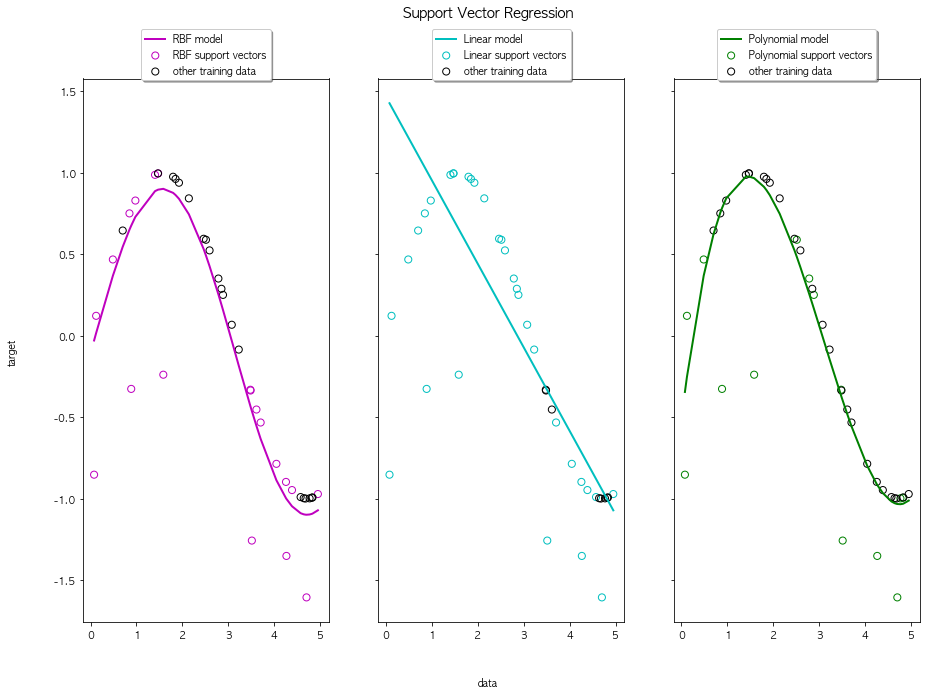

In [348]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        x,
        svr.fit(x, y).predict(x),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        x[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        x[np.setdiff1d(np.arange(len(x)), svr.support_)],
        y[np.setdiff1d(np.arange(len(x)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

## K-Nearest Neighbor (K-NN)
- K 개의 근접 이웃에 따른 라벨링/회귀선 도출 (default=5)
- 비모수적인 방법으로 결정경계가 불규칙한 경우에 유리
- K 값이 클 수록 경계 모호성이 줄어듦

### (1) KNN-Classifier

In [349]:
### Loan default data
loan200 = pd.read_csv("./Practical_Statictics/data/loan200.csv")

predictors = ['payment_inc_ratio', 'dti']
outcome = 'outcome'

newloan = loan200.loc[0:0, predictors]

In [350]:
x = loan200.loc[1:, predictors]
y = loan200.loc[1:, outcome]
pd.concat([x, y], axis=1)

,payment_inc_ratio,dti,outcome
1,5.46933,21.33,default
2,6.90294,8.97,paid off
3,11.14800,1.83,paid off
4,3.72120,10.81,default
5,1.89923,11.34,paid off
...,...,...,...
196,11.66300,26.09,default
197,2.97641,16.41,default
198,1.96846,19.98,default
199,9.64200,20.17,paid off


In [351]:
from sklearn.neighbors import KNeighborsClassifier

In [352]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x, y)

print(knn.predict_proba(newloan)) # predict 함수는 사용 불가

[[0.45 0.55]]


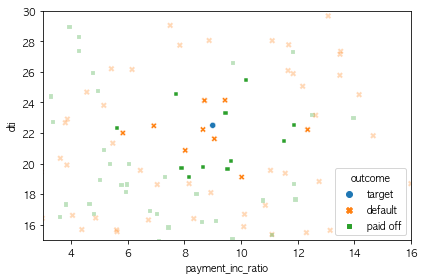

In [353]:
nbrs = knn.kneighbors(newloan)
maxDistance = np.max(nbrs[0][0])

sns.scatterplot(x='payment_inc_ratio', y='dti', style='outcome', hue='outcome', data=loan200, alpha=0.3)
sns.scatterplot(x='payment_inc_ratio', y='dti', style='outcome', hue='outcome', data=pd.concat([loan200.loc[0:0, :], loan200.loc[nbrs[1][0] + 1,:]]), legend=False)
plt.xlim(3, 16)
plt.ylim(15, 30)

plt.tight_layout()
plt.show()

In [354]:
### Add scaler
loan_data = pd.read_csv("./Practical_Statictics/data/loan_data.csv.gz")
loan_data = loan_data.drop(columns=['Unnamed: 0', 'status'])
loan_data['outcome'] = pd.Categorical(loan_data['outcome'], categories=['paid off', 'default'], ordered=True)

predictors = ['payment_inc_ratio', 'dti', 'revol_bal', 'revol_util']
outcome = 'outcome'

newloan = loan_data.loc[0:0, predictors]

x = loan_data.loc[:, predictors]
y = loan_data.loc[:, outcome]

In [355]:
scaler = StandardScaler()
scaler.fit(x * 1.0)

x_std = scaler.transform(x * 1.0)
newloan_std = scaler.transform(newloan * 1.0)

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_std, y)

nbrs = knn.kneighbors(newloan_std)
x.iloc[nbrs[1][0], :].head()

,payment_inc_ratio,dti,revol_bal,revol_util
0,2.39320,1.00,1687,9.4
2080,2.61091,1.03,1218,9.7
1438,2.34343,0.51,278,9.9
30215,2.71200,1.34,1075,8.5
28542,2.39760,0.74,2917,7.4


In [356]:
### KNN as a feature
loan_data['borrower_score'] = knn.predict_proba(x)[:, 0]
print(loan_data['borrower_score'].describe())

count    45342.000000
mean         0.502365
std          0.024868
min          0.300000
25%          0.500000
50%          0.500000
75%          0.500000
max          0.950000
Name: borrower_score, dtype: float64


array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])

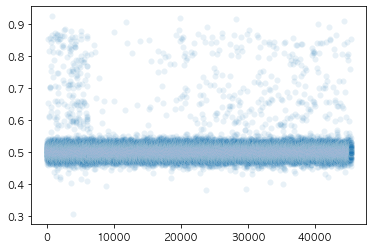

In [357]:
sns.scatterplot(x=range(len(x)), y=[bs + random.gauss(0, 0.015) for bs in knn.predict_proba(x)[:, 0]], alpha=0.1)
knn.predict_proba(x)[:, 0]

In [358]:
### liver patient data
liver = pd.read_csv('./ADP_book_ver01/data/indian_liver_patient.csv')

liver.Gender = np.where(liver.Gender=='Female', 0, 1) # target encoding
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [359]:
### NA 탐색
print(liver.isna().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [360]:
### drop NA
liver.dropna(axis=0, inplace=True)
print(liver.isna().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


In [361]:
x = liver[liver.columns.difference(['Dataset'])]
y = liver['Dataset']

In [362]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, train_size=0.7, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(405, 10) (174, 10) (405,) (174,)


In [363]:
### Modeling
clf = KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [364]:
pred = clf.predict(x_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1 * 100, 2)))

[[106  18]
 [ 39  11]]
정확도	67.24%
정밀도	73.1%
재현율	85.48%
F1	78.81%


### (2) KNN-Regressor

In [365]:
# 임의의 샘플데이터 생성하기
np.random.seed(0)
x = np.sort(5 * np.random.rand(400, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(x).ravel()

print(x[:5])
print(T[:5])

[[0.02347738]
 [0.05713729]
 [0.05857042]
 [0.06618429]
 [0.08164251]]
[[0.        ]
 [0.01002004]
 [0.02004008]
 [0.03006012]
 [0.04008016]]


In [366]:
# 타깃데이터에 노이즈 추가하기
y[::1] += 1 * (0.5 - np.random.rand(400))

In [367]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(280, 1) (120, 1) (280,) (120,)


In [368]:
from sklearn.neighbors import KNeighborsRegressor

In [369]:
### Modeling
# uniform/distance. distance의 경우 가까운 이웃에 가중치가 있음
knn_uni = KNeighborsRegressor(n_neighbors=20, weights='uniform')
knn_dis = KNeighborsRegressor(n_neighbors=20, weights='distance')

knn_uni.fit(x_train, y_train)
knn_dis.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=20, weights='distance')

In [370]:
uni_pred = knn_uni.predict(x_test)
dis_pred = knn_dis.predict(x_test)

preds = [uni_pred, dis_pred]
weights = ['uniform', 'distance']
evls = ['mse', 'rmse', 'mae']

results = pd.DataFrame(index=weights, columns=evls)
for pred, nm in zip(preds, weights):
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mse)
    
    results.loc[nm]['mse']=round(mse, 2)
    results.loc[nm]['rmse']=round(rmse, 2)
    results.loc[nm]['mae']=round(mae, 2)
results

,mse,rmse,mae
uniform,0.1,0.31,0.27
distance,0.11,0.34,0.28


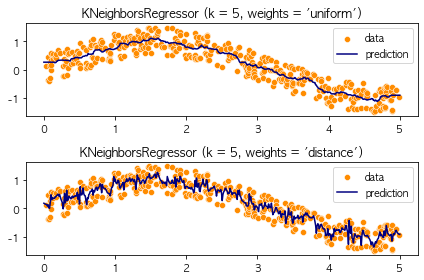

In [371]:
for i, weights in enumerate(["uniform", "distance"]):
    knn = KNeighborsRegressor(n_neighbors=20, weights=weights)
    
    y_ = knn.fit(x, y).predict(T)
    
    plt.subplot(2, 1, i + 1)
    sns.scatterplot(x=x.reshape(1, -1)[0], y=y.reshape(1, -1)[0], color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (5, weights))

plt.tight_layout()
plt.show()

## Decision Tree
- 의사결정 규칙을 Tree 구조로 나타내어 분류하거나 예측 -> 설명하기 쉽다
- input/target에 어떤 데이터 형태이든 사용 가능하며, 선형성/정규성 등 가정이 들어가지 않는다
- train data의 변화에 민감(Data의 회전 등)
- 노드 내 동질성, 노드 간 이질성이 커지도록 최적화
     - 분류: Chi-square statistic (크게), Gini index/Entropy index (작게)
     - 회귀: F-statistic, Variance reduction (크게)
- CART 알고리즘이 사용됨
- Root node, Parent/Child node, Terminal node
- Pruning으로 모형 단순화하여 Overfitting 방지 필요 (Overfitting 가능성 높음)
- 변수 중요도: 0-1 사이 숫차로 표현되며, 총 합은 1

### (1) DecisionTreeClassifier

In [378]:
### credit data
credit = pd.read_csv('./ADP_book_ver01/data/credit_final.csv')
credit.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [379]:
feature_columns = list(credit.columns.difference(['credit.rating']))
x = credit[feature_columns]
y = credit['credit.rating']

In [380]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(700, 20) (300, 20) (700,) (300,)


In [381]:
### Modeling
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=4) # gini 불순도(default) 기준으로 하며, 두 개의 규제가 있음. 최대 노드 깊이, 노드 당 데이터 수
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)

In [382]:
pred = clf.predict(x_test)
test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('정확도\t{}%'.format(round(test_acc *100,2)))
print('정밀도\t{}%'.format(round(test_prc *100,2)))
print('재현율\t{}%'.format(round(test_rcll *100,2)))
print('F1\t{}%'.format(round(test_f1 * 100, 2)))

[[ 32  58]
 [ 31 179]]
정확도	70.33%
정밀도	75.53%
재현율	85.24%
F1	80.09%


In [383]:
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.51      0.36      0.42        90
           1       0.76      0.85      0.80       210

    accuracy                           0.70       300
   macro avg       0.63      0.60      0.61       300
weighted avg       0.68      0.70      0.69       300



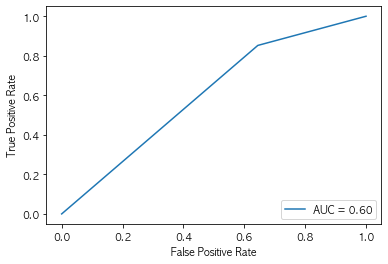

In [384]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc) # plot_roc_curve(clf, x_test, y_test)
display.plot()

In [385]:
R_A_score = roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])
print('ROC_AUC_score : ', R_A_score)

ROC_AUC_score :  0.6954232804232805


In [386]:
importances = clf.feature_importances_ # 0~1 사이의 값
column_nm = pd.DataFrame(x.columns)
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis=1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

                        feature_nm  importances
0                  account.balance     0.276525
1                              age     0.075409
2                   apartment.type     0.022754
3                     bank.credits     0.000000
4                    credit.amount     0.109753
5           credit.duration.months     0.200911
6                   credit.purpose     0.043163
7                   current.assets     0.000000
8                       dependents     0.000000
9              employment.duration     0.007947
10                  foreign.worker     0.000000
11                       guarantor     0.025057
12                installment.rate     0.000000
13                  marital.status     0.000000
14                      occupation     0.008224
15                   other.credits     0.050822
16  previous.credit.payment.status     0.114132
17              residence.duration     0.009553
18                         savings     0.055750
19                       telephone     0

In [387]:
### OS에 설치 필요할 수 있음
# !brew (yum, dnf) install graphviz
# !pip install pydot
# !pip install pydotplus
# !pip install graphviz
import pydot
import pydotplus
import graphviz

from sklearn.tree import export_graphviz
from IPython.display import Image

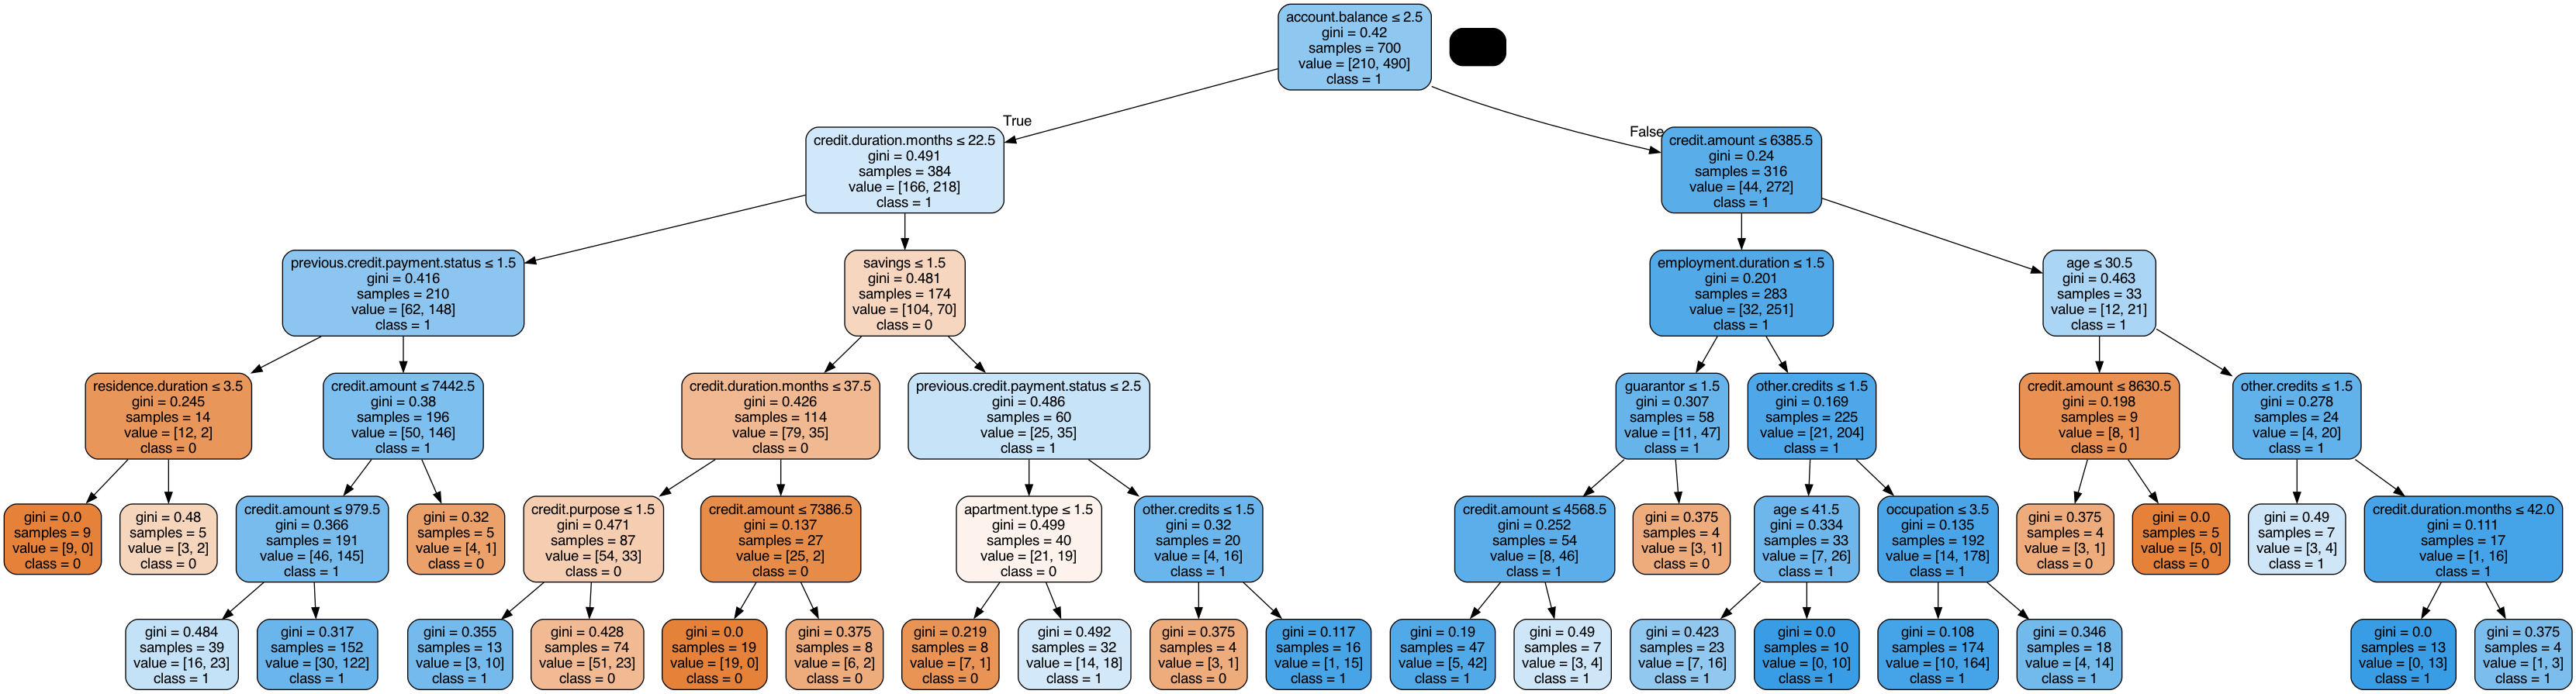

In [388]:
### Tree 시각화
feature_names = feature_columns
target_names = np.array(['0', '1'])

dt_dot_data = export_graphviz(clf, feature_names = feature_names,
                              class_names = target_names,
                              filled=True, rounded =True,
                              special_characters=True)
dt_graph=pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())

In [389]:
# Binary class & 숫자 label로 변경 -> ROC, AUC를 구해보기 위함
### Iris data
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'})

iris = iris[iris.Class != 'Setosa']
iris['Class'] = np.where(iris.Class=='Virginica', 1, 0) 

In [390]:
iris.Class.unique()

array([0, 1])

In [391]:
iris.shape

(100, 5)

In [392]:
### Data split
x_train, x_test, y_train, y_test = train_test_split(iris.drop('Class', axis=1), iris['Class'], test_size=0.2, random_state=0, stratify=iris['Class'])

In [393]:
### Modeling
dtree_clf_5 = DecisionTreeClassifier(max_depth=5, random_state=100, criterion="entropy") # entropy를 분류기준으로
dtree_clf_3 = DecisionTreeClassifier(max_depth=3, random_state=100, criterion="entropy")
dtree_clf_1 = DecisionTreeClassifier(max_depth=1, random_state=100, criterion="entropy")

In [394]:
### Cross validation
scores = cross_val_score(dtree_clf_5, x_train, y_train, scoring='accuracy', cv=10) # dataset 10개로 분할
print('교차검증 정확도: ', np.round(scores, 3))
print('평균 검증 정확도: ', np.round(np.mean(scores), 4))

scores = cross_val_score(dtree_clf_3, x_train, y_train, scoring='accuracy', cv=10)
print('교차검증 정확도: ', np.round(scores, 3))
print('평균 검증 정확도: ', np.round(np.mean(scores), 4))

scores = cross_val_score(dtree_clf_1, x_train, y_train, scoring='accuracy', cv=10)
print('교차검증 정확도: ', np.round(scores, 3))
print('평균 검증 정확도: ', np.round(np.mean(scores), 4))

교차검증 정확도:  [0.75  0.875 0.875 0.875 0.875 1.    1.    0.875 0.75  0.875]
평균 검증 정확도:  0.875
교차검증 정확도:  [0.75  0.875 0.875 0.875 0.875 1.    1.    0.875 0.75  0.875]
평균 검증 정확도:  0.875
교차검증 정확도:  [0.875 0.875 0.75  0.875 0.875 1.    1.    0.875 0.875 0.875]
평균 검증 정확도:  0.8875


In [395]:
dtree_clf_5.fit(x_train, y_train)
pred = dtree_clf_5.predict(x_test)

print('의사결정나무(교차검증 후) 예측 정확도: {0:.5f}'.format(accuracy_score(y_test, pred)))

# pos_label default=1, 1이 아닌 경우 지정해 줘야 함
print('의사결정나무 Virginica Precision: {0:.5f}'.format(precision_score(y_test, pred)))
print('의사결정나무 Virginica Recall: {0:.5f}'.format(recall_score(y_test, pred)))
print('의사결정나무 Virginica F1: {0:.5f}'.format(f1_score(y_test, pred)))

의사결정나무(교차검증 후) 예측 정확도: 1.00000
의사결정나무 Virginica Precision: 1.00000
의사결정나무 Virginica Recall: 1.00000
의사결정나무 Virginica F1: 1.00000


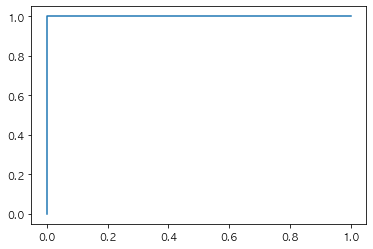

1.0

In [396]:
### ROC, AUC
# FPR, TPR, 임곗값 할당하기
fpr, tpr, thres = roc_curve(y_test, pred)
    
# ROC 곡선 그리기
plt.plot(fpr, tpr)
plt.show()

# AUC
auc(fpr, tpr)

In [397]:
### Confusion matrix
cm = confusion_matrix(y_test, pred)
cm

array([[10,  0],
       [ 0, 10]])

In [398]:
### Model evaluation
pred = pd.DataFrame(pred, columns=['pred Species'])
actual = pd.DataFrame(y_test.values, columns=['actual Species'])

classify_result = pd.concat([actual, pred], axis=1)
classify_result.head()

,actual Species,pred Species
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1


In [399]:
### Class probability
dtree_clf_5.predict_proba([[5, 1.5, 1.5, 3]])

array([[0., 1.]])

In [400]:
dtree_clf_5.predict([[5, 1.5, 1.5, 3]])

array([1])

In [401]:
### Result 파일 저장
# classify_result.to_csv('clf_result.csv', index=False, encoding='utf-8-sig')

In [402]:
export_graphviz(dtree_clf_5, out_file="tree.dot", class_names='Class', feature_names = iris.columns.difference(['Class']), impurity=True, filled=True)

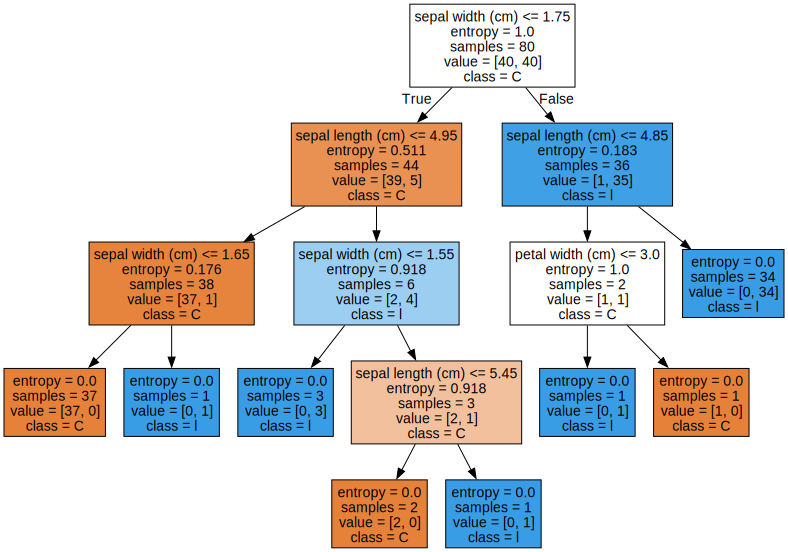

In [403]:
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.    0.025 0.221 0.754]
petal length (cm) : 0.000
petal width (cm) : 0.025
sepal length (cm) : 0.221
sepal width (cm) : 0.754


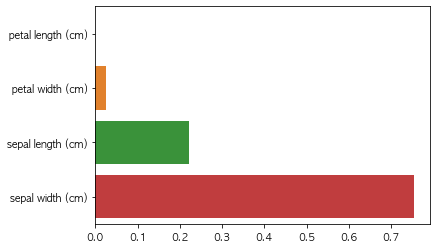

In [404]:
# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dtree_clf_5.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris.columns.difference(['Class']), dtree_clf_5.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dtree_clf_5.feature_importances_ , y=iris.columns.difference(['Class']))
plt.show()

### (2) DecisionTreeRegressor

In [436]:
### air quality data
air = pd.read_csv('./r_csv/datasets/airquality.csv', index_col='Unnamed: 0')

air = air.dropna()
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
7,23.0,299.0,8.6,65,5,7


In [437]:
x_train, x_test, y_train, y_test = train_test_split(air.drop('Ozone', axis=1), air['Ozone'], train_size=0.8, random_state=1)

In [427]:
from sklearn.tree import DecisionTreeRegressor

In [438]:
regr = DecisionTreeRegressor(max_depth=3)
regr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [439]:
pred = regr.predict(x_test)

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f'mse: {mse}')
print(f'mae: {mae}')
print(f'R2: {r2}')

mse: 326.6441916428406
mae: 13.438405797101451
R2: 0.4602018762954526


In [444]:
### 결정 경계 시각화 -> air quality data로 수정하여 반영 예정
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성. 
x_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 Price 추출
x_feature = boston_sample['RM'].values.reshape(-1, 1)
y_target = boston_sample['MEDV'].values.reshape(-1, 1)

# 학습과 예측 수행. 
rf_reg2.fit(x_feature, y_target)
rf_reg7.fit(x_feature, y_target)

pred_rf2 = rf_reg2.predict(x_test)
pred_rf7 = rf_reg7.predict(x_test)

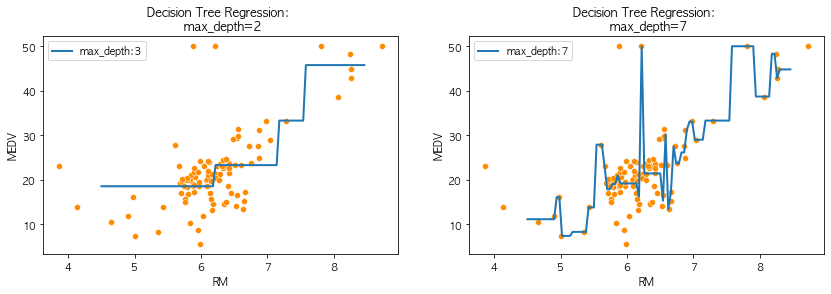

In [445]:
fig, (ax1, ax2) = plt.subplots(figsize=(14, 4), ncols=2)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 트리 회귀 예측 선 시각화
# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax1.set_title('Decision Tree Regression: \n max_depth=2')
sns.scatterplot(x=boston_sample.RM, y=boston_sample.MEDV, color="darkorange", ax=ax1)
sns.lineplot(x=x_test.reshape(1, -1)[0], y=pred_rf2.reshape(1, -1)[0], label="max_depth:3", linewidth=2, ax=ax1)

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=7')
sns.scatterplot(x=boston_sample.RM, y=boston_sample.MEDV, color="darkorange", ax=ax2)
sns.lineplot(x=x_test.reshape(1, -1)[0], y=pred_rf7.reshape(1, -1)[0], label="max_depth:7", linewidth=2, ax=ax2)
plt.show()

## Naive Bayes
- 데이터가 특정 클래스에 속할 확률 계산
- 특징들은 상호 독립적이라는 가정
- 빠르고, 노이즈와 결측치에 강하지만, 독립 가정이 깨지는 경우 문제 발생
- 데이터가 많지 않거나, 미래 예측이 목적일 때 사용
- 라플라스 스무딩: 출현하지 않은 특징의 빈도 조정 (+1)

### (1) GaussianNB
- 연속적인 성질의 데이터를 분류하는 데 사용
- 특징들의 값은 정규분포를 가정하고 조건부 확률 계산

In [20]:
sky = pd.read_csv("./ADP_book_ver01/data/Skyserver.csv")
sky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [21]:
sky['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

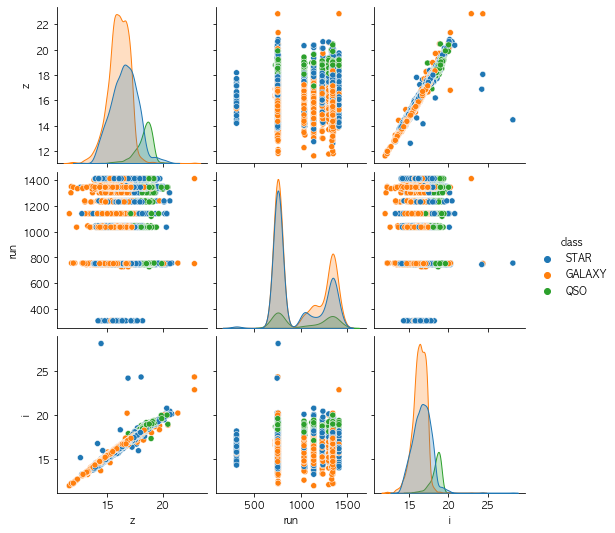

In [22]:
sns.pairplot(hue='class', data=sky[['z', 'run', 'i', 'class']])
plt.show()

In [23]:
features = list(sky.columns)
features.remove('class')
x = sky[features]
y = sky['class']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(7000, 17) (7000,) (3000, 17) (3000,)


In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
gnb = GaussianNB()

pred = gnb.fit(x_train, y_train).predict(x_test)
print("Accuracy Score : ", gnb.score(x_test, y_test))

Accuracy Score :  0.799


In [27]:
gnb.predict_proba(x_test)[[0, 13, 68]]

array([[8.26737014e-01, 4.43137039e-02, 1.28949282e-01],
       [5.39851854e-05, 9.64092748e-02, 9.03536740e-01],
       [8.32868012e-01, 4.48282737e-02, 1.22303715e-01]])

In [28]:
gnb.predict(x_test)[[0, 13, 68]]

array(['GALAXY', 'STAR', 'GALAXY'], dtype='<U6')

In [29]:
pred = gnb.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      GALAXY       0.74      0.97      0.84      1499
         QSO       0.00      0.00      0.00       255
        STAR       0.91      0.75      0.83      1246

    accuracy                           0.80      3000
   macro avg       0.55      0.58      0.56      3000
weighted avg       0.75      0.80      0.76      3000



### (2) BernoulliNB
- 이산형 데이터 (1, 0으로 이루어진 데이터)를 input으로 함
- CountVertorizer

In [30]:
spam = pd.read_csv('./ADP_book_ver01/data/spam.csv', encoding='utf-8')
spam.head() # 잘못 로드된 column이 있음

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [32]:
spam = spam[['v1', 'v2']]
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ? b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [31]:
spam.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [33]:
spam['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [34]:
spam['label'] = np.where(spam['v1']=='spam', 1, 0) # encoding
spam

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ? b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [35]:
x = spam['v2']
y = spam['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3900,) (3900,)
(1672,) (1672,)


In [36]:
from sklearn.feature_extraction.text import CountVectorizer 

In [37]:
### Text to count vector
# data를 1, 0으로 변환해야 함
cv = CountVectorizer(binary=True)
x_traincv = cv.fit_transform(x_train)
x_traincv.shape # 메일 수, 단어 수

(3900, 7175)

In [38]:
encoded_input = x_traincv.toarray()
encoded_input

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [39]:
print(cv.inverse_transform(encoded_input[[0]])) # original data 확인
print(cv.get_feature_names_out()[1000:1010], end='')

[array(['couple', 'down', 'give', 'me', 'minutes', 'my', 'sure', 'to',
       'track', 'wallet', 'yeah'], dtype='<U34')]
['at' 'ate' 'athletic' 'athome' 'atlanta' 'atlast' 'atm' 'attach'
 'attached' 'attack']

In [40]:
from sklearn.naive_bayes import BernoulliNB

In [41]:
bnb = BernoulliNB()
bnb.fit(x_traincv, y_train)

BernoulliNB()

In [42]:
x_testcv = cv.transform(x_test)
pred = bnb.predict(x_testcv)

acc = accuracy_score(y_test, pred)
print("Accuracy Score : ", acc)
print(classification_report(y_test, pred))

Accuracy Score :  0.9754784688995215
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1448
           1       0.99      0.82      0.90       224

    accuracy                           0.98      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672



### (3) MultinomialNB
- 이산형 데이터를 input으로 함
- CounterVectorizer (binary=False)
- 출현 횟수에 따라 값이 달라질 때 사용

In [43]:
from sklearn.naive_bayes import MultinomialNB

In [44]:
loan_data = pd.read_csv("./Practical_Statictics/data/loan_data.csv.gz", index_col="Unnamed: 0")

# convert to categorical
loan_data.outcome = loan_data.outcome.astype('category')
loan_data.outcome.cat.reorder_categories(['paid off', 'default'])
loan_data.purpose_ = loan_data.purpose_.astype('category')
loan_data.home_ = loan_data.home_.astype('category')
loan_data.emp_len_ = loan_data.emp_len_.astype('category')

loan_data.head()

,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,home_ownership,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,RENT,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,OWN,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,RENT,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,RENT,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,RENT,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


In [45]:
predictors = ['purpose_', 'home_', 'emp_len_']
outcome = 'outcome'
x = pd.get_dummies(loan_data[predictors], prefix='', prefix_sep='', dtype=int)
y = loan_data[outcome]

In [46]:
naive_model = MultinomialNB(alpha=1e-10, fit_prior=False) # 사후 확률 비계산
naive_model.fit(x, y)

new_loan = x.loc[146:146, :]
print('predicted class: ', naive_model.predict(new_loan)[0])

probabilities = pd.DataFrame(naive_model.predict_proba(new_loan),
                             columns=naive_model.classes_)
print('predicted probabilities',)
print(probabilities)

predicted class:  default
predicted probabilities
    default  paid off
0  0.562448  0.437552


In [47]:
from keras.datasets import imdb

2023-08-31 13:14:57.387867: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [48]:
(x_train, y_train), (x_test, y_test) = imdb.load_data()

In [49]:
### word index to text
word_to_index = imdb.get_word_index()
index_to_word = {}

for key, value in word_to_index.items():
    index_to_word[value + 3] = key
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

train_reviews = []
for x in x_train:
    tmp =' '.join([index_to_word[index] for index in x])
    train_reviews.append(tmp)

test_reviews = []
for x in x_test:
    tmp =' '.join([index_to_word[index] for index in x])
    test_reviews.append(tmp)

train = pd.concat([pd.DataFrame(train_reviews), pd.DataFrame(y_train)], axis =1)
train.columns = ['reviews', 'label']
train['reviews'] = train['reviews'].str[6:]

test = pd.concat([pd.DataFrame(test_reviews), pd.DataFrame(y_test)], axis =1)
test.columns = ['reviews', 'label']
train['reviews'] = train['reviews'].str[6:]

print("<<<<<<<<< Train Dataset for MNB >>>>>>>>>", train)
print("<<<<<<<<< Test Dataset for MNB >>>>>>>>>", test)

<<<<<<<<< Train Dataset for MNB >>>>>>>>>                                                  reviews  label
0      ilm was just brilliant casting location scener...      1
1      ir big boobs bad music and a giant safety pin ...      0
2      as to be one of the worst films of the 1990s w...      0
3      ots excel at storytelling the traditional sort...      1
4      mistake of my life br br i picked this movie u...      0
...                                                  ...    ...
24995  s a racist movie but worthy of study and enjoy...      1
24996  ugosi plays a doctor who will do anything to k...      0
24997  ar away galaxy is a planet called ceta it's na...      0
24998  grees had me hooked i looked forward to it com...      1
24999  ig fan of the original film it's hard to watch...      0

[25000 rows x 2 columns]
<<<<<<<<< Test Dataset for MNB >>>>>>>>>                                                  reviews  label
0      <sos> please give this one a miss br br kristy...   

In [50]:
x_train, x_test = train['reviews'].values, test['reviews'].values
y_train, y_test = train['label'].values, test['label'].values

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
cv = CountVectorizer(binary=False) # 개수 세기
x_traincv = cv.fit_transform(x_train)
x_traincv.shape

(25000, 76521)

In [53]:
print(cv.inverse_transform(x_traincv)[0])
print(cv.get_feature_names_out()[-10:])

['ilm' 'was' 'just' 'brilliant' 'casting' 'location' 'scenery' 'story'
 'direction' 'everyone' 'really' 'suited' 'the' 'part' 'they' 'played'
 'and' 'you' 'could' 'imagine' 'being' 'there' 'robert' 'redford' 'is'
 'an' 'amazing' 'actor' 'now' 'same' 'director' 'norman' 'father' 'came'
 'from' 'scottish' 'island' 'as' 'myself' 'so' 'loved' 'fact' 'real'
 'connection' 'with' 'this' 'film' 'witty' 'remarks' 'throughout' 'were'
 'great' 'it' 'much' 'that' 'bought' 'soon' 'released' 'for' 'retail'
 'would' 'recommend' 'to' 'watch' 'fly' 'fishing' 'cried' 'at' 'end' 'sad'
 'know' 'what' 'say' 'if' 'cry' 'must' 'have' 'been' 'good' 'definitely'
 'also' 'congratulations' 'two' 'little' 'boy' 'of' 'paul' 'children'
 'are' 'often' 'left' 'out' 'praising' 'list' 'think' 'because' 'stars'
 'play' 'them' 'all' 'grown' 'up' 'such' 'big' 'profile' 'whole' 'but'
 'these' 'should' 'be' 'praised' 'done' 'don' 'lovely' 'true' 'someone'
 'life' 'after' 'shared' 'us']
['était' 'état' 'étc' 'évery' 'êxtase'

In [54]:
mnb = MultinomialNB()
mnb.fit(x_traincv, y_train)

MultinomialNB()

In [55]:
x_testcv = cv.transform(x_test)
pred = mnb.predict(x_testcv)
acc = accuracy_score(y_test, pred)
print("Accuracy Score : ", acc)
print(classification_report(y_test, pred))

Accuracy Score :  0.81932
              precision    recall  f1-score   support

           0       0.79      0.87      0.83     12500
           1       0.85      0.77      0.81     12500

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000



## Artificial Neural Networks (ANN)
- 동물의 뇌 신경계를 모방하여 만들어진 모형
- Input layer, Hidden layer, Output layer
- 다양한 활성함수들: sign(threshold), step, sigmoid, softman, tanh, gauss

### (1) NN Basics

#### Perceptron
- TLU (Threshold logic unit)
- 입력의 가중치 합을 계산하여, Step function을 통해 결과 출력

In [71]:
from sklearn.linear_model import Perceptron

In [86]:
### Iris data
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target

In [92]:
x = iris.iloc[:, 2:4]  # 꽃잎 길이, 꽃잎 너비
y = (iris.Class!=2).astype(np.int)

In [94]:
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42) # SGDClassifier(loss="perceptron", learning_rate="constant", eta0=1, penalty=None) 와 동일
per_clf.fit(x, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

#### Activation functions

In [95]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

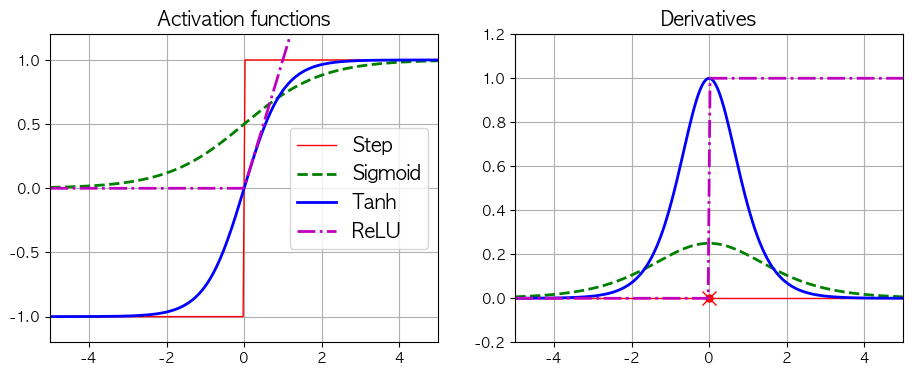

In [96]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

#### Multi Perceptron (MLP)
- XOR 문제 해결 가능

In [97]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

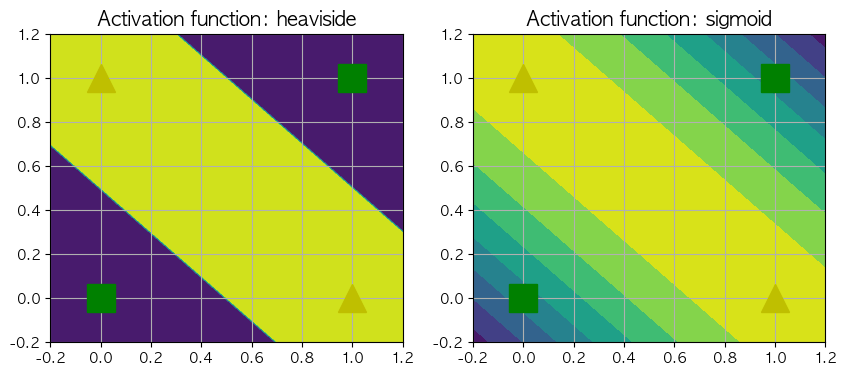

In [98]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

### (2) MLP-Classifier

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [106]:
### Data split
x_train, x_test, y_train, y_test = train_test_split(iris.drop('Class', axis=1), iris['Class'], test_size=0.2, random_state=0, stratify=iris['Class'])

In [107]:
### Modeling
mlp = MLPClassifier(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=2, max_iter=10000, random_state=1)
mlp.fit(x_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=2, max_iter=10000, random_state=1,
              solver='lbfgs')

In [109]:
pred = mlp.predict(x_test)
test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred, average=None)
test_rcll = recall_score(y_test, pred, average=None)
test_f1 = f1_score(y_test, pred, average=None)

print(test_cm)
print('정확도\t{}'.format(test_acc))
print('정밀도\t{}'.format(test_prc))
print('재현율\t{}'.format(test_rcll))
print('F1\t{}'.format(test_f1))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
정확도	1.0
정밀도	[1. 1. 1.]
재현율	[1. 1. 1.]
F1	[1. 1. 1.]


In [110]:
mlp.coefs_

[array([[ -0.16594035,   7.19341217],
        [ -0.99967701,   8.30118013],
        [ -0.70642163, -11.15587477],
        [ -0.62742043,  -9.37536558]]),
 array([[ -0.17701926,   0.40575734,  -0.64745165],
        [ 14.79742108,   8.73623989, -23.36722916]])]

### (3) MLP-Regressor

In [117]:
from sklearn.neural_network import MLPRegressor

In [118]:
### random sqrt data
x = np.random.randint(0, 100, 50).reshape(-1, 1)
y = np.sqrt(x)

In [119]:
### Modeling
mlp = MLPRegressor(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(10, 8), random_state=1)
mlp.fit(x, y)

MLPRegressor(alpha=1e-05, hidden_layer_sizes=(10, 8), random_state=1,
             solver='lbfgs')

In [120]:
new_x = np.random.randint(0, 100, 10)
new_x

array([ 1, 83, 23, 91, 42, 97, 40, 13, 95, 45])

In [121]:
mlp.predict(new_x.reshape(-1, 1))

array([0.91933071, 9.29573575, 4.63137952, 9.29573575, 6.24120805,
       9.29573575, 6.07175242, 3.78410135, 9.29573575, 6.49539151])